First of all, we will designate the input and output directory for the source files. When we download the PubMed articles, the files were downloaded as .txt files. We will convert it into xlsx files for every cancer types.

In [2]:
# Breast cancer
input_txt_breast_cancer = 'source_files_txt/breast_cancer.txt'
output_xlsx_breast_cancer = 'source_files_xlsx/breast_cancer.xlsx'

# lung cancer
input_txt_lung_cancer = 'source_files_txt/lung_cancer.txt'
output_xlsx_lung_cancer = 'source_files_xlsx/lung_cancer.xlsx'

# Colorectal cancer
input_txt_colorectal_cancer = 'source_files_txt/colorectal_cancer.txt'
output_xlsx_colorectal_cancer = 'source_files_xlsx/colorectal_cancer.xlsx'

# Prostate cancer
input_txt_prostate_cancer = 'source_files_txt/prostate_cancer.txt'
output_xlsx_prostate_cancer = 'source_files_xlsx/prostate_cancer.xlsx'

# Stomach cancer
input_txt_stomach_cancer = 'source_files_txt/stomach_cancer.txt'
output_xlsx_stomach_cancer = 'source_files_xlsx/stomach_cancer.xlsx'

# Liver cancer
input_txt_liver_cancer = 'source_files_txt/liver_cancer.txt'
output_xlsx_liver_cancer = 'source_files_xlsx/liver_cancer.xlsx'

# Cervix cancer
input_txt_cervix_cancer = 'source_files_txt/cervix_cancer.txt'
output_xlsx_cervix_cancer = 'source_files_xlsx/cervix_cancer.xlsx'

# Oesophagus cancer
input_txt_oesophagus_cancer = 'source_files_txt/oesophagus_cancer.txt'
output_xlsx_oesophagus_cancer = 'source_files_xlsx/oesophagus_cancer.xlsx'

# Thyroid cancer
input_txt_thyroid_cancer = 'source_files_txt/thyroid_cancer.txt'
output_xlsx_thyroid_cancer = 'source_files_xlsx/thyroid_cancer.xlsx'

# Bladder cancer
input_txt_bladder_cancer = 'source_files_txt/bladder_cancer.txt'
output_xlsx_bladder_cancer = 'source_files_xlsx/bladder_cancer.xlsx'

input_txt_files = [
    input_txt_breast_cancer, input_txt_lung_cancer, input_txt_colorectal_cancer, input_txt_prostate_cancer,
    input_txt_stomach_cancer, input_txt_liver_cancer, input_txt_cervix_cancer, input_txt_oesophagus_cancer,
    input_txt_thyroid_cancer, input_txt_bladder_cancer
]

output_xlsx_files = [
    output_xlsx_breast_cancer, output_xlsx_lung_cancer, output_xlsx_colorectal_cancer, output_xlsx_prostate_cancer,
    output_xlsx_stomach_cancer, output_xlsx_liver_cancer, output_xlsx_cervix_cancer, output_xlsx_oesophagus_cancer,
    output_xlsx_thyroid_cancer, output_xlsx_bladder_cancer
]

In [3]:
PMID_index_list_of_list = []
lines_array = []

for input_file in input_txt_files:
    PMID_index_list = []
    with open(input_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        #print(len(lines))
    lines_array.append(lines)
    
    article_count = 0
    index = 0
    
    for line in lines:
        if line.startswith('PMID'):
            PMID_index_list.append(index)
            article_count += 1
        index +=1
    PMID_index_list.append(index)
    PMID_index_list_of_list.append(PMID_index_list)
    
    #print(input_file)
    #print(f"the number of articles in {input_file} is {article_count}\n")

In [4]:
#print(len(lines_array))
#print(len(lines_array[1]))
#print(len(lines_array[0][0]))
#article_count

In [5]:
articles_list_of_list = []
for one_cancer_type in range(len(PMID_index_list_of_list)):
    articles_list = []
    for i in range(article_count):
        for one_line in range(PMID_index_list_of_list[one_cancer_type][i], PMID_index_list_of_list[one_cancer_type][i+1]):
            articles_list.append(lines_array[one_cancer_type][one_line])
    articles_list_of_list.append(articles_list)

In [6]:
#print(len(articles_list_of_list))
#print(len(articles_list_of_list[1]))
#print(len(articles_list_of_list[0]))
#articles_list_of_list[0]

In [7]:
PMID_list_of_list = []
TI_list_of_list = []
AB_list_of_list = []

for one_articles_list in articles_list_of_list:
    current_line = 0
    PMID_list = []
    AB_list = []
    TI_list = []
    while current_line < len(one_articles_list):
        #len(one_articles_list) (DO NOT DELETE THIS LINE AT ALL COST)
        if one_articles_list[current_line].startswith('PMID'):
            PMID = one_articles_list[current_line].split('- ')
            PMID_list.append(PMID[1].strip())
            #print(f'PMID {current_line}')
            current_line += 1
        elif one_articles_list[current_line].startswith('TI'):
            TI = one_articles_list[current_line][6:-1].strip()
            #TI_list.append(TI)
            #print(f'TI {current_line}')
            #current_line += 1
            while one_articles_list[current_line+1].startswith('    '):
                next_line = one_articles_list[current_line+1].strip()
                TI = TI + ' ' + next_line
                #TI_list.append(TI)
                #print(f'TI {current_line}')
                current_line += 1
            TI_list.append(TI)
        elif one_articles_list[current_line].startswith('AB'):
            AB = one_articles_list[current_line][6:-1].strip()
            #AB_list.append(AB)
            #print(f'AB {current_line}')
            #current_line += 1
            while one_articles_list[current_line+1].startswith('    '):
                next_line = one_articles_list[current_line+1].strip()
                AB = AB + ' ' + next_line
                #AB_list.append(AB)
                #print(f'AB {current_line}')
                current_line += 1
            AB_list.append(AB)
        current_line += 1
    
    PMID_list_of_list.append(PMID_list)
    TI_list_of_list.append(TI_list)
    AB_list_of_list.append(AB_list)

In [8]:
#print(len(PMID_list_of_list))
#print(PMID_list_of_list)
#print('\n\n')
#print(len(TI_list_of_list[2]))
#print(TI_list_of_list)
#print('\n\n')
#print(len(AB_list_of_list))
#print(AB_list_of_list[0])

In [9]:
#for j in range(10):
#    print(len(PMID_list_of_list[j]))
#print('\n')
#for j in range(10):
#    print(len(TI_list_of_list[j]))
#print('\n')
#for j in range(10):
#    print(len(AB_list_of_list[j]))

In [10]:
import pandas as pd
from itertools import zip_longest

cancer_types = ["Breast", "Lung", "Colorectal", "Prostate", "Stomach", "Liver", "Cervix", "Oesophagus", "Thyroid", "Bladder"]

for i in range(len(cancer_types)):
    pmid_list = PMID_list_of_list[i]
    ti_list = TI_list_of_list[i]
    ab_list = AB_list_of_list[i]
    
    zipped_data = list(zip_longest(pmid_list, ti_list, ab_list, fillvalue=None))
    
    pmid_list, ti_list, ab_list = zip(*zipped_data)

    data = {
        'PMID': pmid_list,
        'TI': ti_list,
        'AB': ab_list,
        'Type': [cancer_types[i]] * len(pmid_list)
    }
    df = pd.DataFrame(data)

    df.to_excel(output_xlsx_files[i], index=False)
    #print(f"Saved data for {cancer_types[i]} cancer to {output_xlsx_files[i]}")

In [11]:
dataframes = []
for i in range(10):
    df = pd.read_excel(output_xlsx_files[i], index_col = None)
    dataframes.append(df)
    #print(output_xlsx_files[i])
    #print(df.shape)
    #print(df.head(5))
    #print('\n')
#print(dataframes[0])

for cancer_df in dataframes:
    cancer_df['TI_AB'] = cancer_df['TI'].astype(str) + ' ' + cancer_df['AB'].astype(str)


# I don't think this is necessarry but okay 🤔⬇️

breast_df = dataframes[0]
lung_df = dataframes[1] 
colorectal_df = dataframes[2]
prostate_df = dataframes[3]
stomach_df = dataframes[4]
liver_df = dataframes[5]
cervix_df = dataframes[6]
oesophagus_df = dataframes[7]
thyroid_df = dataframes[8]
bladder_df = dataframes[9]

In [12]:
# just checking, don't mind me :3 nya~~~ uwu

print(dataframes[1]['Type'].unique())

['Lung']


In [13]:
tokens_by_type = {}

for i in range(len(dataframes)):
    cancer_type = dataframes[i]['Type'].unique()[0]
    tokens_by_type[cancer_type] = [article.split() for article in dataframes[i]['TI_AB']]

In [14]:
# just checking, don't mind me uwu

print(len(tokens_by_type))
print(len(tokens_by_type['Breast']))
print(len(tokens_by_type['Breast'][0]))

10
10000
147


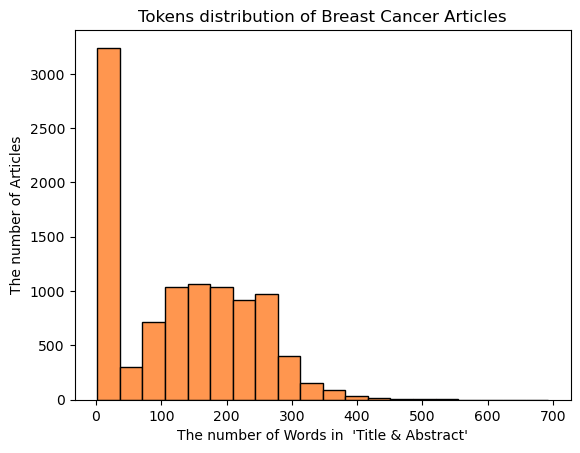

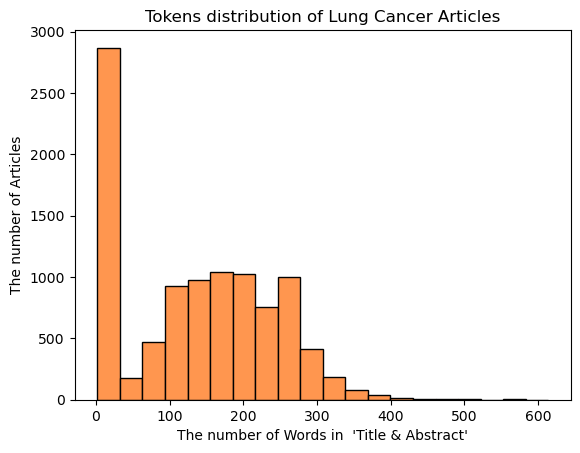

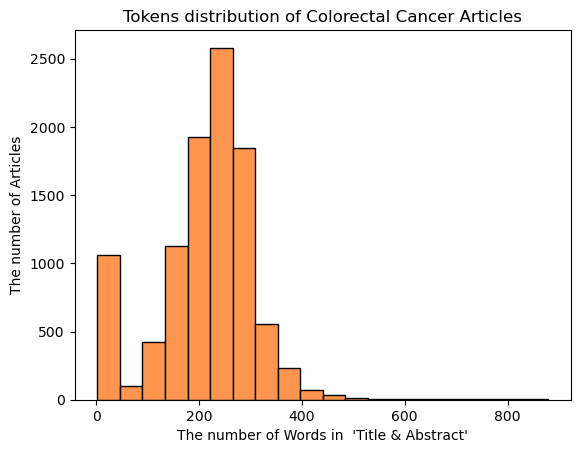

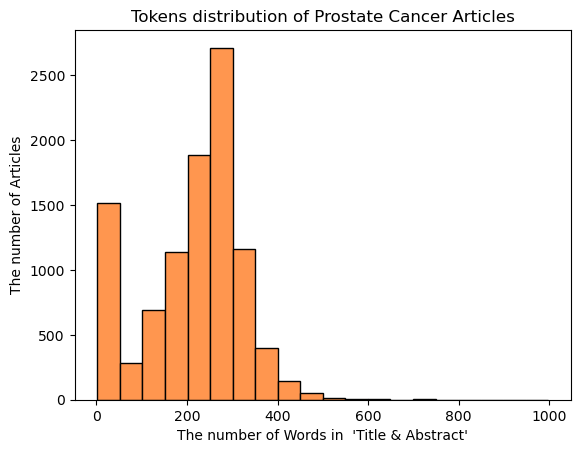

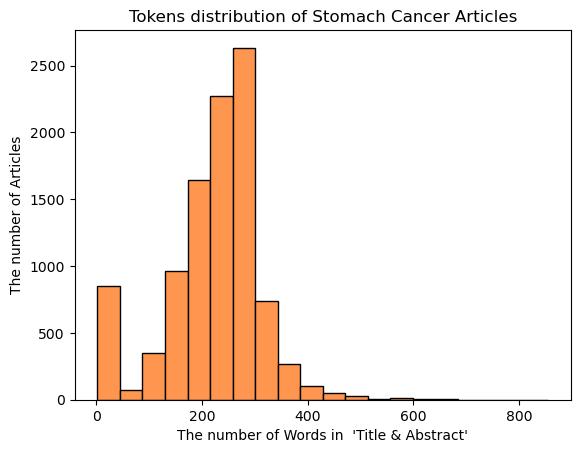

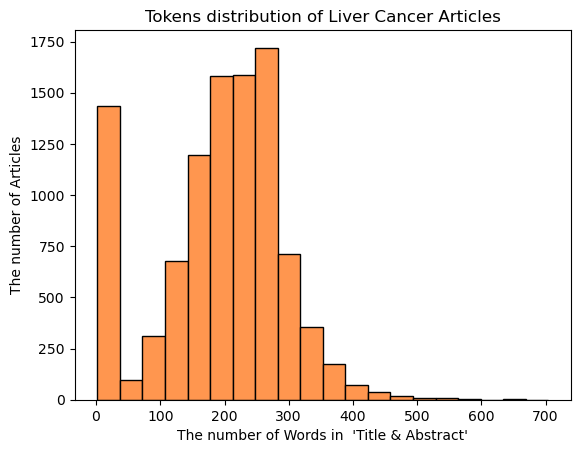

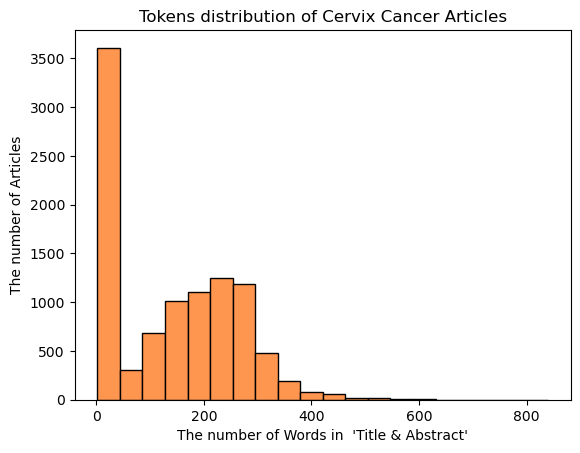

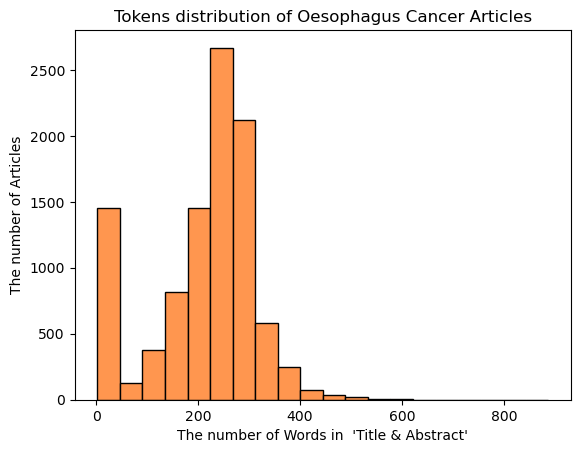

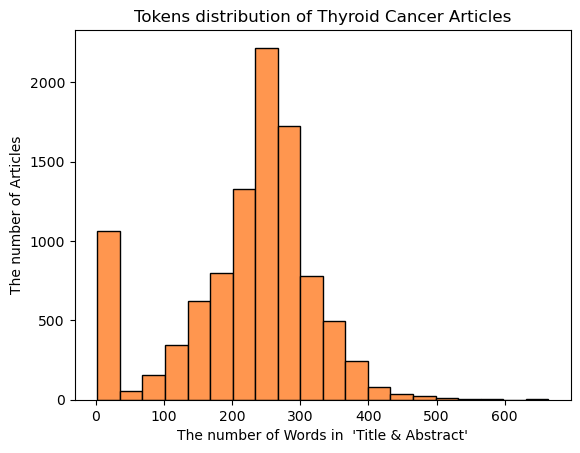

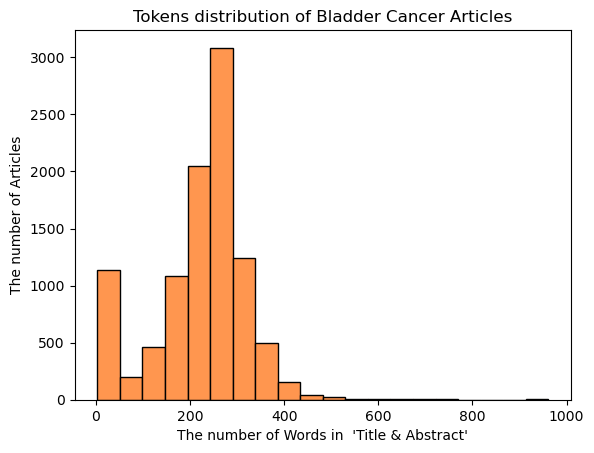

In [15]:
# HISTOGRAM

import matplotlib.pyplot as plt

for cancer_type in tokens_by_type.keys():
    tokens_distribution = [len(token) for token in tokens_by_type[cancer_type]]

    plt.hist(tokens_distribution, bins = 20, color = 'xkcd:pastel orange', edgecolor = 'black')
    plt.title(f"Tokens distribution of {cancer_type} Cancer Articles")
    plt.xlabel("The number of Words in  'Title & Abstract'")
    plt.ylabel("The number of Articles")

    plt.savefig(f'./figures/{cancer_type}_number_of_tokens_TI_AB.png')
    plt.show()

In [16]:
import re

filtered_tokens_by_type = {}

for cancer_type in tokens_by_type.keys():
    filtered_tokens_by_type[cancer_type] = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for token in tokens_by_type[cancer_type] for word in token]))


In [17]:
# FILTER TOKENS
# this also combines every lists into one

filtered_tokens = []

for cancer_type in tokens_by_type.keys():
    filtered_tokens += list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for token in tokens_by_type[cancer_type] for word in token]))

In [18]:
print(len(filtered_tokens))
print(filtered_tokens[9112001])

18253141
be


In [20]:
# Lower each token from filtered tokens
# Remove the stop words

import nltk

stopwords = nltk.corpus.stopwords.words('English')

filtered_tokens_lower = [token.lower() for token in filtered_tokens]
filtered_tokens_nostopwords = [token for token in filtered_tokens_lower if token not in stopwords]

In [21]:
# --------------- DIS WAN IS DIRTY BRAT ⬇️
filtered_tokens_by_type_lower = {}
filtered_tokens_by_type_nostopwords = {}

for cancer_type in filtered_tokens_by_type.keys():

    filtered_tokens_by_type_lower[cancer_type] = [token.lower() for token in filtered_tokens_by_type[cancer_type]]
    filtered_tokens_by_type_nostopwords[cancer_type] = [token for token in filtered_tokens_by_type_lower[cancer_type] if token not in stopwords]

In [23]:
print(len(filtered_tokens_by_type_nostopwords['Lung']))

860991


In [24]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokens_lemmatized = [lemmatizer.lemmatize(token) for token in filtered_tokens_nostopwords]

In [26]:
tokens_lemmatized_by_type = {}

for cancer_type in filtered_tokens_by_type_nostopwords.keys():
    tokens_lemmatized_by_type[cancer_type] = [lemmatizer.lemmatize(token) for token in filtered_tokens_by_type_nostopwords[cancer_type]]

In [27]:
print(len(tokens_lemmatized))
print(len(tokens_lemmatized_by_type['Lung']))
print(tokens_lemmatized_by_type.keys())

11985642
860991
dict_keys(['Breast', 'Lung', 'Colorectal', 'Prostate', 'Stomach', 'Liver', 'Cervix', 'Oesophagus', 'Thyroid', 'Bladder'])
